# Introduction to ML - M. Linear Regression Example for Beginners

### 1. What is Machine Learning (ML) in a nutshell

- “Machine learning is the science (and art) of programming computers so they can learn from data” by Aurélien Géron book (Hands-On Machine Learning with Scikit-Learn and TensorFlow) 


- ML uses statistical models and algorithms to perform tasks like predictions & classifications without explicit instructions 


- ML is a subset of Artificial Intelligence

### 2. Machine Learning Process

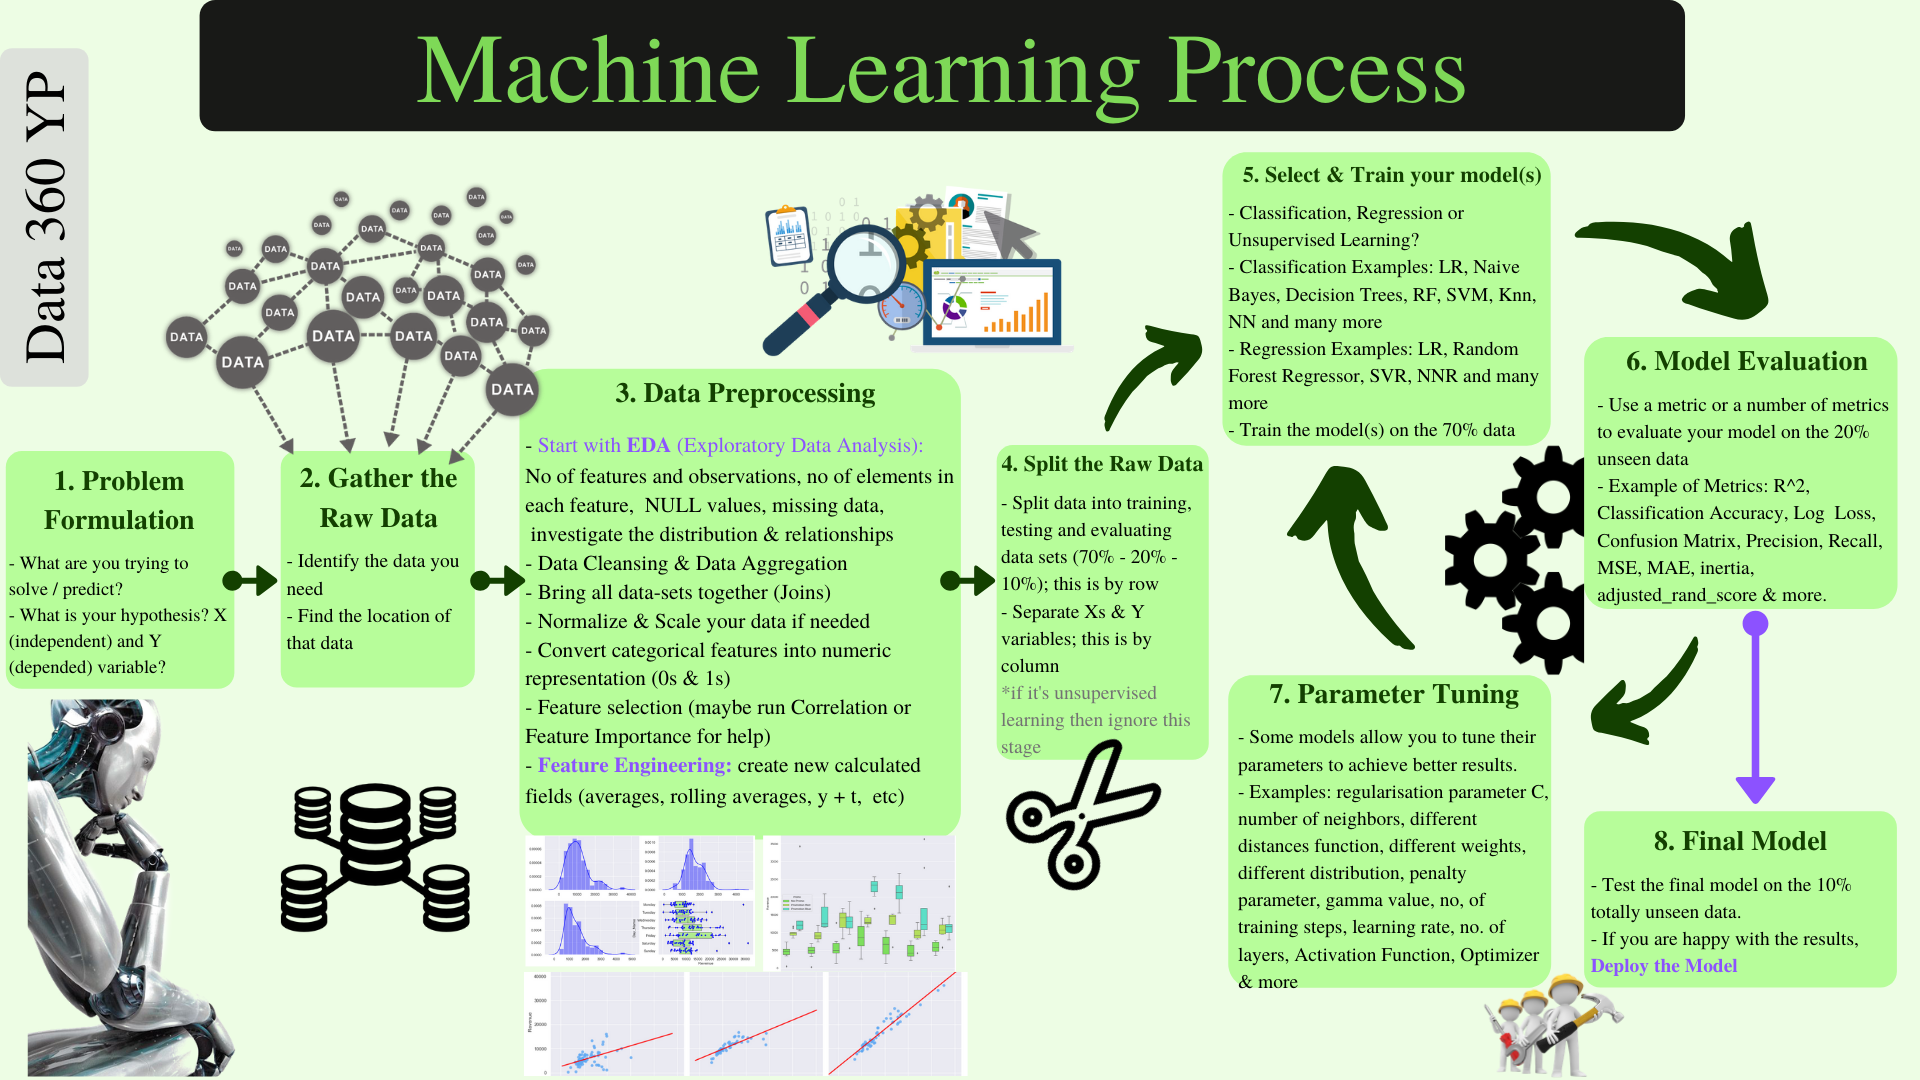

In [1]:
### Graphical ML Process

import os
from IPython.display import Image
PATH = "..\\Introduction to ML - Logistic Regression Example\\"
Image(filename = PATH + "Machine Learning.png", width=900, height=900)



## Tutorial Overview

##### Video 1:
1. What is Machine Learning
2. Process of Machine Learning
3. Problem Formulation

##### Video 2:
4. Loading the Raw Data
5. Data Preprocessing
    - EDA
    - Data Cleaning
    - Feature Selection
6. Splitting the Raw Data

##### Video 3:
7. What is Linear Regression Analysis
8. Running Regression
9. Evaluating the Model
10. How to use our L. Regression model

### 3. Problem Formulation

- In this example, we want to investigate "what factors/variables affect the performance of revenue"
- Our aim is to go back to the business and make suggestions about how to generate more revenue
- Make Revenue predictions given specific variable values
- Hence our Dependent variable (y) is Revenue

#### Importing / Installing packages

In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# import sys
# !conda list Check the packages installed

### 4. Loading the Raw Data

In [3]:
# Loading the data
raw_data = pd.read_csv('..\\Introduction to ML - Linear Regression Example\\Marketing Raw Data.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(185, 11)


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis

In [4]:
# Checking for null values

raw_data.isnull().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [5]:
# Visualize the NULL observations


raw_data[raw_data['Week'].isnull()]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Ways of dealing with missing data
- Delete the whole observation
- Replace the NULL value with another value (mean, rolling mean, last day value, closest day value, mode, median, zero, etc)

In [6]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Week'])

# Printing the shape
raw_data.shape

# Visualize the NULL observations
raw_data.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

In [7]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :182
The number of values for feature Week :28
The number of values for feature Week_ID :28
The number of values for feature Month :7 -- [1.000000 2.000000 3.000000 4.000000 5.000000 11.000000 12.000000]
The number of values for feature Month_ID :7 -- [11.000000 12.000000 13.000000 14.000000 15.000000 16.000000 17.000000]
The number of values for feature Year :2 -- [2020.000000 2021.000000]
The number of values for feature Day_Name :7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values for feature Visitors :175
The number of values for feature Revenue :181
The number of values for feature Marketing Spend :182
The number of values for feature Promo :3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             182 non-null    object 
 1   Week             182 non-null    float64
 2   Week_ID          182 non-null    float64
 3   Month            182 non-null    float64
 4   Month_ID         182 non-null    float64
 5   Year             182 non-null    float64
 6   Day_Name         182 non-null    object 
 7   Visitors         182 non-null    float64
 8   Revenue          182 non-null    float64
 9   Marketing Spend  182 non-null    float64
 10  Promo            182 non-null    object 
dtypes: float64(8), object(3)
memory usage: 21.1+ KB


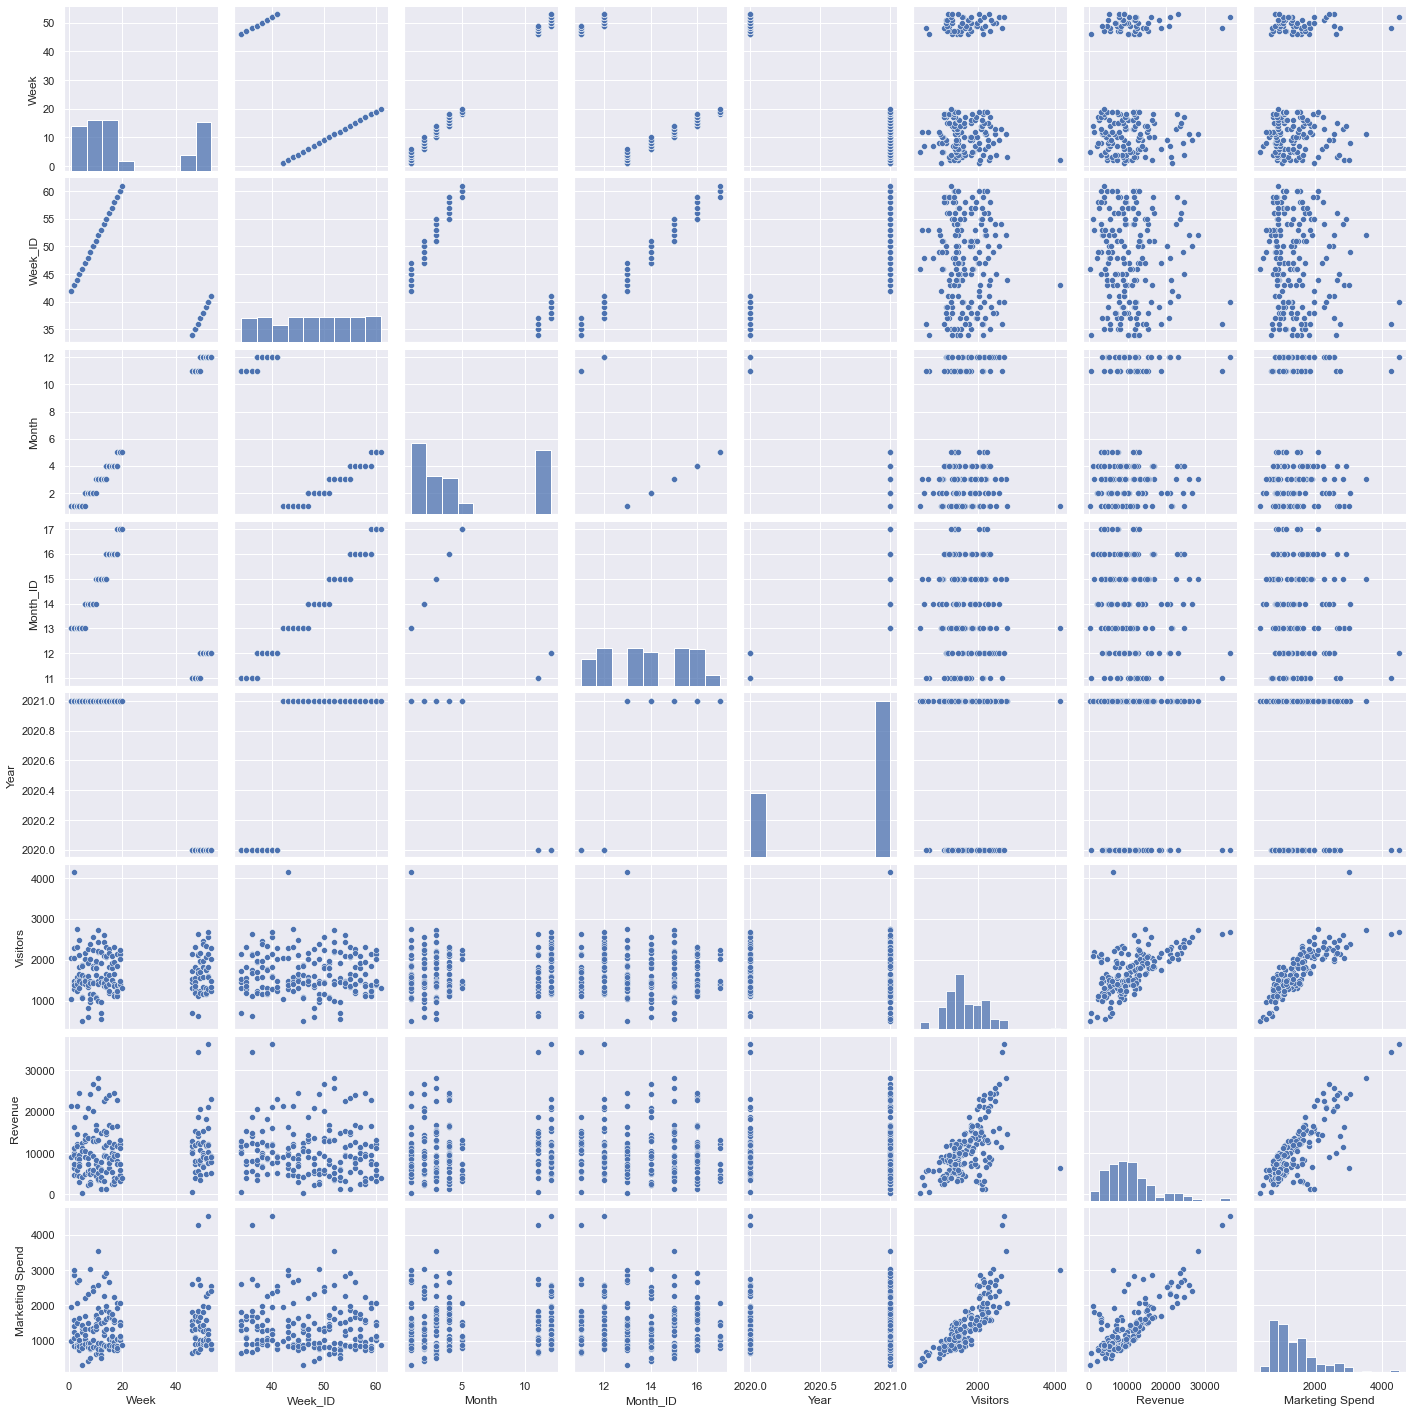

In [23]:
# Visualize the data using seaborn Pairplots

raw_data.info()

#g = sns.pairplot(raw_data[['Date', 'Week', 'Week_ID',  'Month', 'Month_ID', 'Year', 'Day_Name',
#       'Visitors', 'Revenue', 'Marketing Spend', 'Promo']])
g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

In [9]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

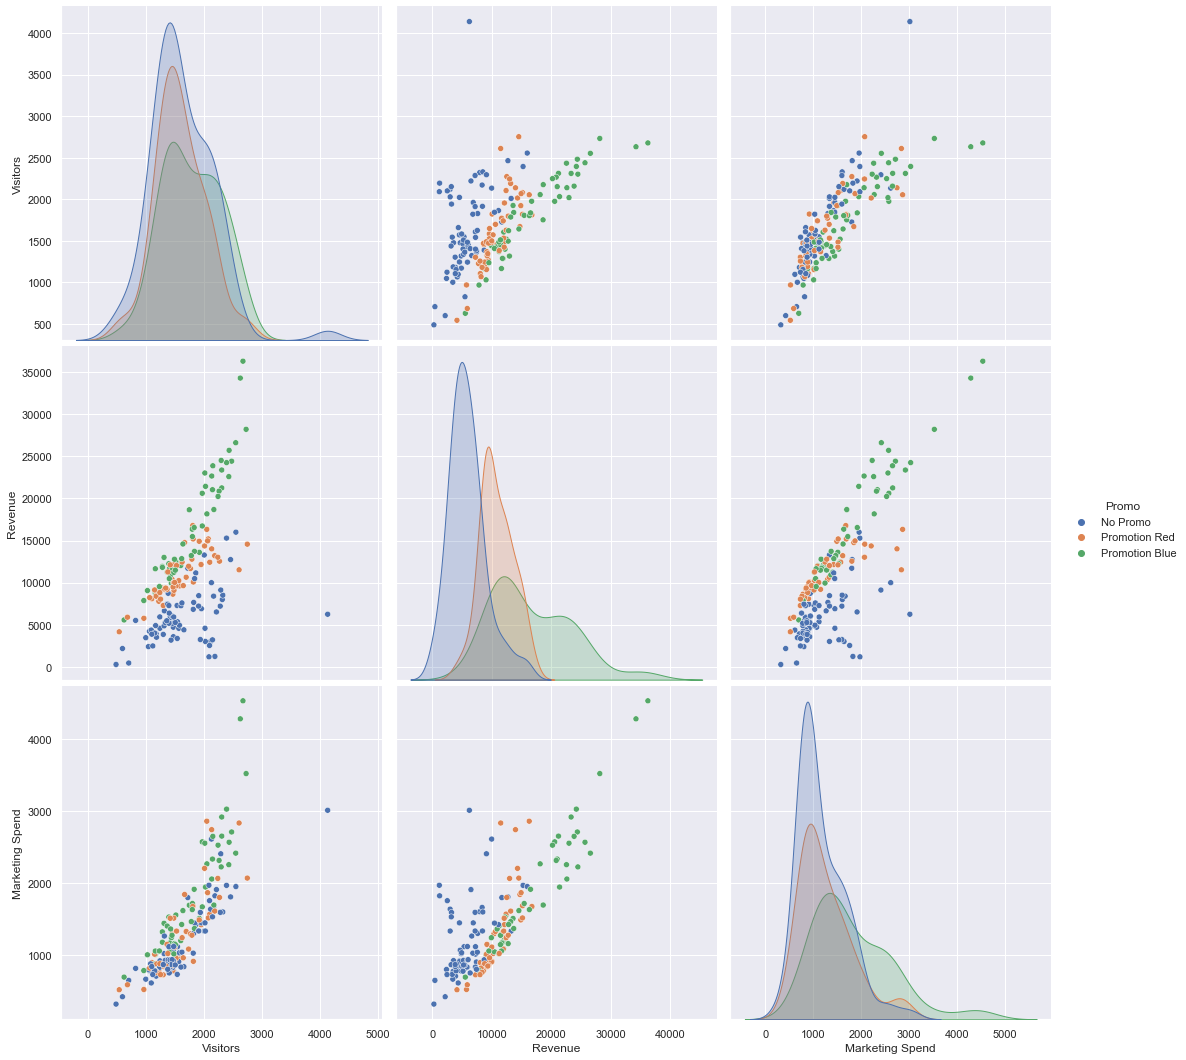

In [10]:
# Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue = 'Promo', height = 5)

In [ ]:
# Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Day_Name']], hue = 'Day_Name', height = 5)

In [ ]:
# Visualising a Subset of our data - important features

g = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

In [ ]:
# Investigate the distribution of Revenue by Categorical Variables

pal = ['green', 'blue','red']

g = sns.boxplot(x = 'Day_Name', y = 'Revenue', data = raw_data, hue = 'Promo', palette = pal)
               
#ax = sns.swarmplot(x = 'Day_Name', y = 'Revenue', data = raw_data, palette = pal, hue = 'Promo')

### 5.2. Data Cleaning

In [ ]:
# Deleting outliers

raw_data = raw_data[raw_data['Revenue'] < 27000]

raw_data.shape

In [ ]:
# Column names
raw_data.columns

In [ ]:
# Selecting usefull columns only
raw_data = raw_data[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]

#visualize the raw data
raw_data.head()

In [ ]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['Promo', 'Day_Name'])

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

# Visualizing the data
new_raw_data.head()

### 5.3. Feature Selection

In this example, we do not have many variables so we should use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time

- 2 ways to help us select the important features are:
    - Correlation 
    - Feature Importance

In [ ]:
# Running Correlation

hm = new_raw_data[['Visitors','Revenue','Marketing Spend']].corr()

#### Notes
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
- 0.8 +- is Strong Correlation, 0.6 to 0.8 +- is moderate Correlation & the other values, there is no correlation
- More Info here: https://statisticsbyjim.com/basics/correlations/

In [ ]:
# Visualizing Correlation with a Heatmap

g = sns.heatmap(hm, annot = True, annot_kws={'size':50})

#### Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests) 
- Run Feature Importance

In [ ]:
# Split the data into X & y

X = new_raw_data.drop('Revenue', axis = 1).values
X2 = new_raw_data.drop('Revenue', axis = 1)
y = new_raw_data['Revenue']

print(X.shape)
print(y.shape)

X

In [ ]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### Notes:
- The importance of a feature is calculated as the (normalized) total reduction of entropy (other criterions too) brought by that feature or the higher information gain
- To understand the maths, read this: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

In [ ]:
# Running Feature Importance

for i, column in enumerate(new_raw_data.drop('Revenue', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

#### Notes:
- Please note that we have not normalised / scale our data
- Please note that we have not done any feature engineering - created new features
- Please note that we have not joined multiple datasets together
- Please note that we have not aggregated any of our data

## 6. Splitting the Raw Data - Hold-out validation

In [ ]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## 7. What is Linear Regression Analysis

- Linear regression is a widely used machine learning model that predicts continues numbers as outputs; not classes 
- It models the relationship of 2 plus variables by fitting a linear equation to observed data 
- In linear regression you have 1 dependent variable (y) and 1 plus independent variables (X)
- Before you attempt to model the data, you should check if there is a relationship between the variables first; a good way is to use a scatterplot to visualise the data



In [ ]:
### Graphical Anscombe's_quartet

PATH = "..\\Introduction to ML - Linear Regression Example\\"
Image(filename = PATH + "Anscombe's_quartet.png", width=900, height=900)


# identical descriptive statistics
# identical mean, std, variances, correlations, and regression lines

### What is Linear Regression Analysis (continued)

- A measurement of the relationship between 2 variables is the correlation coefficient; ranging from -1 to 1; the closer to 1 or -1, the stronger the relationship

- However, even if there seems to be a relationship, you should always be careful when modelling the relationship between 2 variables as correlation is not causation. For example, the rise of temperature vs Revenue

- The mathematical equation of linear regression is Y = a + bX; where X is the independent variable and Y is the dependent variable. ‘b’ is the slope of the line and 'a' is the intercept; the value of y when x = 0


- The most common cost function used in linear regression is the “Least Squared Errors” function; which is the sum of squared errors (sum(y actuals – y predicted) ^ 2) over the training set; trying to minimize how far off the predictions are from the actuals.

- To calculate the “Least Squared Errors” firstly you must calculate the difference of the actual (y) vs the p(y); this is called the residuals.

- In order to find the least squared error you will have to find the optimal parameter values (b) that minimize the sum ‘S’ of squared residuals


In [ ]:
# How L Regression iterates until convergence

PATH = "..\\Introduction to ML - Linear Regression Example\\"
Image(filename = PATH + "Regression Example.png", width=900, height=900)


#### What is Linear Regression Analysis (continued)

- The optimisation technique used in linear regression is Gradient Descent; which attempts to find a local or a global minimum of a cost function

- Gradient descent finds the direction ‘gradient’ that the model/line should take so that the errors will be reduced. 

- Direction refers to the weights (a and b), and how those weights should be tweaked to further reduce the errors. 

- The model will iterate until converged; no further improvements can be done; see graph below: 

In [ ]:
# Gradient Descent

PATH = "..\\Introduction to ML - Linear Regression Example\\"
Image(filename = PATH + "Gradient Descent.png", width=900, height=900)

## 8. Running Linear Regression

In [ ]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## 9. Evaluating the Model

In [ ]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


# R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

#### Notes:
    
- The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

- The R Square is measure of how close the data are to the fitted regression line. 

- In this case we can say that our model explains 79% of the training data & 75% of the testing data


- The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the  regression line. Hence RMSE is a measure of how spread your residuals are.

- The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

- Coeff are the weights

- The intercept is the expected mean value of Y when all X=0

In [ ]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size



In [ ]:
# Ploting Residuals

plt.figure(figsize=(15,10))

sns.residplot(x=y_train, y=y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')



In [ ]:
X2.columns

##### The next step should be to go back, remove more outliers and check if our model can be improved

## 10. How to use our L. Regression model to Make Predictions

In [ ]:
# Passing Coeff into a table

Coeff = lm.coef_
Coeff.shape

# Reshaping
Coeff = Coeff.reshape(-1,12)


# Creating a Dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns])

# Displaying 
Coeff_df


In [ ]:
# Making Predictions                        

# Variables

Day = 'Day_Name_Friday'
Visitors = 8000
Marketing_Spend = 5000
Promo = 'Promo_Promotion Red'

# Regression Formula for pred
# y = a + bx + ..   # Where y = price, a = intercept,  b = no. of Visitors and x = coefficient of engine size

# Prediction Calculator
pred1 = (lm.intercept_) + (Coeff_df[Day].values[0] * 1) + (Coeff_df['Visitors'].values[0] * Visitors) + (Coeff_df['Marketing Spend'].values[0] * Marketing_Spend) + (Coeff_df[Promo].values[0] * 1)

print('The predicted Revenue is: ', pred1)




In [ ]:
######################## Where we can apply this as a business and how? #######################################


# 1. We can create a prediction tool for upcoming marketing campaigns 

# 2. We can analyse past marketing campaigns and suggest what work, what did not work, 
# how much money we could have made and suggest changes - campaign optimisation

# 3. We can predict the potential of Stores or Accounts or Channels or Campaigns and compare that with what they actually achieving.
# Then we can grade them and make suggestions (over achieving vs underachieving Vs potential Accounts)

# 4. We can deploy the model in a server/cloud and automatically adjusting the campaigns that generate the most money depending on the day.
# At the same time, keep running A/B testing with new campaigns (ideas) and re-adjust if needed